In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [4]:
model = LogisticRegression()

In [5]:
model.fit(X_train, Y_train)

LogisticRegression()

In [6]:
pred_prob = model.predict_proba(X_test)

In [7]:
fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:, 1], pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ =roc_curve(Y_test, random_probs, pos_label=1)

In [8]:
auc_score = roc_auc_score(Y_test, pred_prob[:, 1])
print("AUC score = ", auc_score)

AUC score =  0.9762374461979914


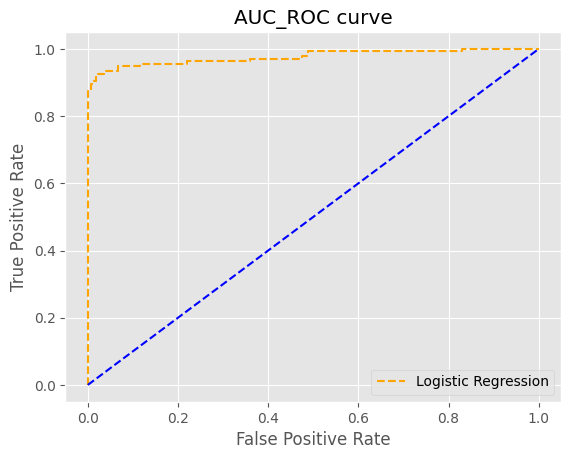

In [18]:
plt.style.use('ggplot')

plt.plot(fpr, tpr, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('AUC_ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()